In [1]:
import matplotlib.pyplot as plt

from manipulator_learning.sim.envs import *
from manipulator_learning.learning.agents.tf.common import CNNActor, convert_env_obs_to_tuple
import manipulator_learning.custom.tf_utils as tf_utils
import utils as ssam_utils

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### Config -- Choose env, model and data locations

In [2]:
env_str = 'ThingDoorMultiview'
main_model_dir = '/home/trevor/data/paper-data/bc-view-agnostic/bc_models'
model_dir = main_model_dir + '/ThingDoorMultiview_200_trajs_1'
gpu = 0  # policies that we're using won't load on a cpu b/c they use groups
env_seed = 0

# ssam stuff
ssam_img_freq = 5

#### Setup -- set up tf, env, and policy

In [3]:
tf_utils.tf_setup(gpu)

# env
action_mult = 1.0 if env_str != 'ThingLiftXYZStateMultiview' else .05
env = globals()[env_str](action_multiplier=action_mult, egl=True, success_causes_done=True)
env.seed(env_seed)

# actor
if env_str == "ThingLiftXYZStateMultiview":
    img_shape = (64, 48, 3)
    obs_shape = 9
else:
    img_shape = env.observation_space.spaces['img'].shape
    obs_shape = env.observation_space.spaces['obs'].shape[0]
act_shape = env.action_space.shape[0]
actor = CNNActor(img_shape, obs_shape, act_shape, num_head_hidden=512, num_ensemble=5)
actor.load_weights(model_dir + '/bc_model')

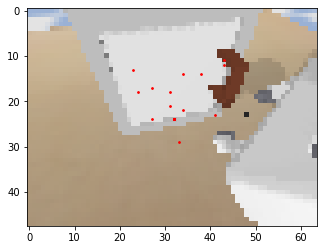

Press enter to continue 


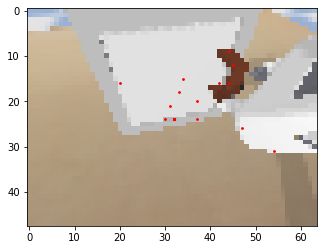

Press enter to continue 


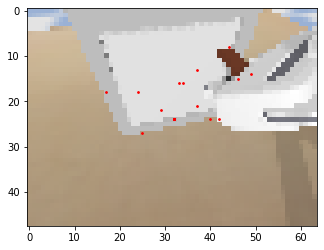

Press enter to continue 


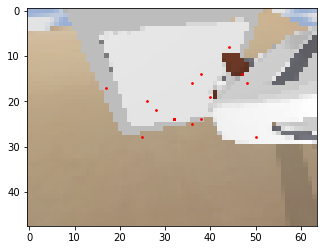

Press enter to continue 


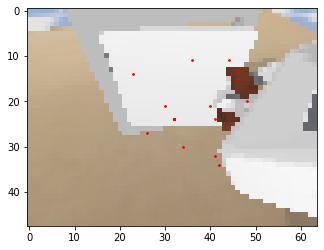

Press enter to continue 


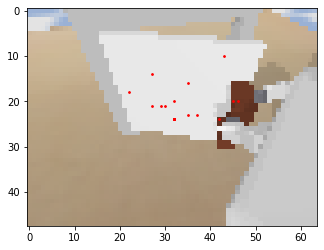

Press enter to continue 


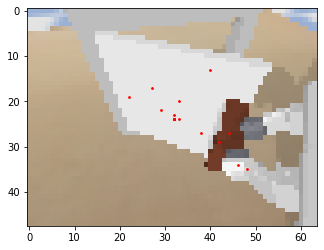

Press enter to continue 


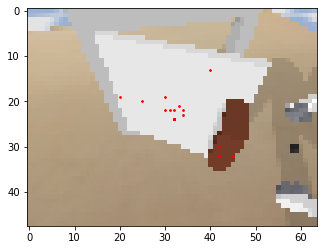

Press enter to continue 


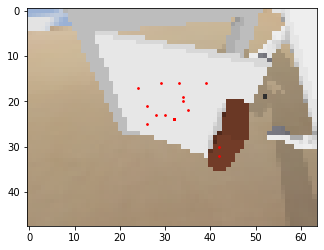

Press enter to continue 


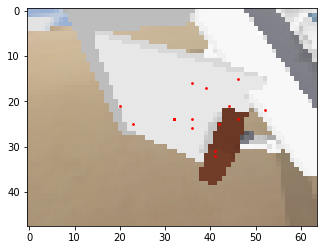

Press enter to continue 


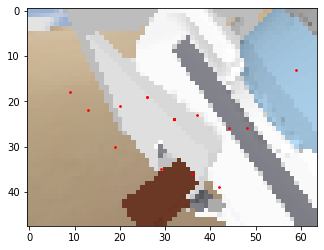

Press enter to continue 


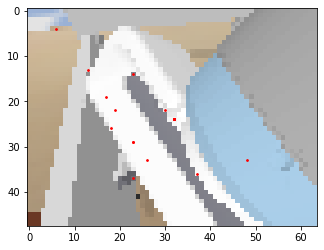

KeyboardInterrupt: Interrupted by user

In [5]:
obs = env.reset()

# todo add in multi episode tools
done = False
while not done:
    act, var, ssam_out = actor.inference(convert_env_obs_to_tuple(obs), also_output_ssam_values=True)
    act = act.numpy()
    
    # get ssam img
    if env.ep_timesteps % ssam_img_freq == 0:
        ssam_img = ssam_utils.convert_raw_ssam_to_img_coords(ssam_out, img_shape)
        im = plt.imshow(obs['img'])
        plt.scatter(ssam_img[0][64:96], ssam_img[1][64:96], c='r', s=3)
        plt.show()
        input("Press enter to continue")
    
    next_obs, rew, done, info = env.step(act)
    
    
    obs = next_obs